# Árboles de regresión

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source #Visualizar grafos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("../datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [24]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [27]:
regtree = DecisionTreeRegressor(min_samples_split = 30, min_samples_leaf=10, random_state=0)
regtree.fit(X,Y)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=30, random_state=0)

In [28]:
preds = regtree.predict(data[predictors])

In [29]:
data["preds"] = preds

In [33]:
data[["preds", "medv"]]

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,22.840000,22.4
502,20.624138,20.6
503,28.978261,23.9
504,31.170000,22.0


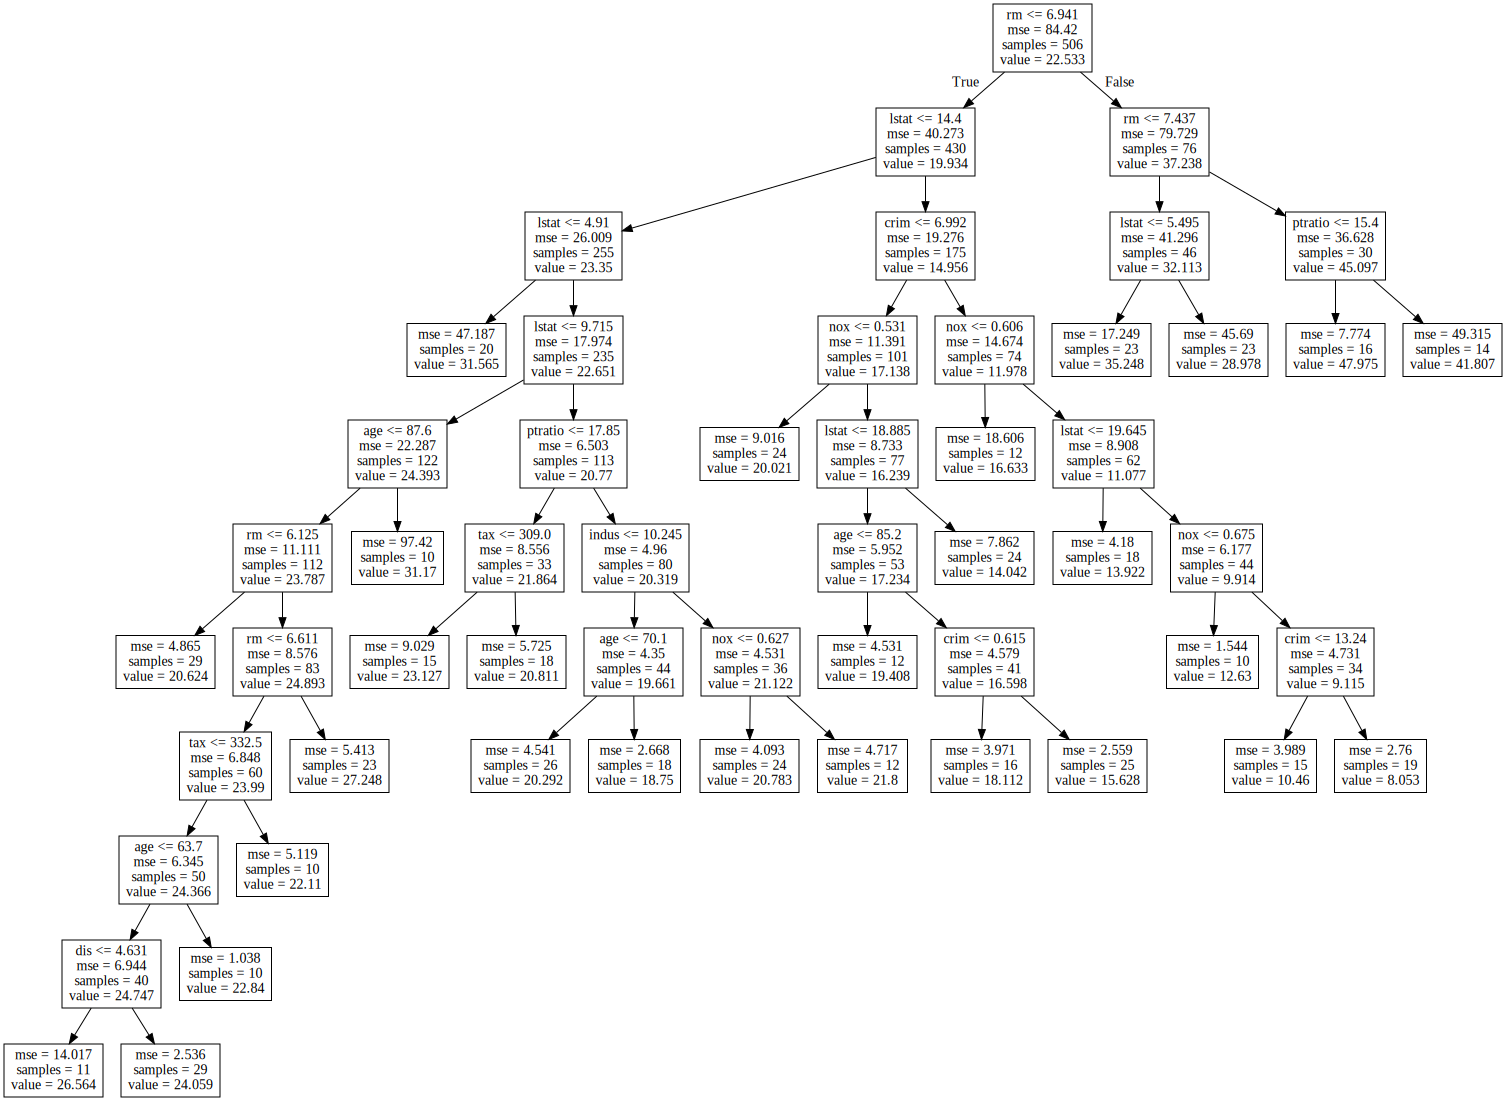

In [39]:
with open("../resources/boston_rtree1.dot", "w") as dotfile:
    export_graphviz(regtree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

file = open("../resources/boston_rtree1.dot", "r")
text = file.read()
Source(text)

In [48]:
cv = KFold(n_splits= 10, shuffle= True, random_state=1)
scores = cross_val_score(regtree, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs=1)
score = np.mean(scores)
print(scores,score,sep="\n")

[-13.64925886 -17.28987161 -16.98569707 -47.56954086  -9.26202865
 -17.23057023 -15.41541493 -31.33011027 -22.79877067  -9.54180723]
-20.107307036443846


In [58]:
sorted(list(zip(predictors, regtree.feature_importances_)), key = lambda x: x[1], reverse=True)

[('rm', 0.6308568014337028),
 ('lstat', 0.28488020584647283),
 ('crim', 0.03421203230639308),
 ('nox', 0.01856163073811432),
 ('age', 0.01725115143448847),
 ('ptratio', 0.009333247332530954),
 ('tax', 0.0023698305298803803),
 ('dis', 0.0013745115995791378),
 ('indus', 0.0011605887788380146),
 ('zn', 0.0),
 ('chas', 0.0),
 ('rad', 0.0),
 ('black', 0.0)]

# Random Forest

In [74]:
forest = RandomForestRegressor(n_jobs = 2, oob_score = True, n_estimators = 1000)
forest.fit(X,Y)

RandomForestRegressor(n_estimators=1000, n_jobs=2, oob_score=True)

In [75]:
data["rforest_pred"] = forest.oob_prediction_
data[["rforest_pred", "medv"]]

,rforest_pred,medv
0,28.537666,24.0
1,22.496694,21.6
2,34.289896,34.7
3,34.587906,33.4
4,34.239353,36.2
...,...,...
501,24.517827,22.4
502,19.031871,20.6
503,28.025000,23.9
504,26.287123,22.0


In [76]:
data["rforest_error2"] = (data.rforest_pred - data.medv)**2
sum(data["rforest_error2"])/len(data)

10.307476277351896

In [77]:
forest.oob_score_

0.8779017949551362